In [1]:
# datasets from my GitHub
!git clone https://github.com/William-HTP/Google-Play-App-Reviews-Datasets.git

Cloning into 'Google-Play-App-Reviews-Datasets'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 3.18 MiB | 11.12 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [39]:
df = pd.read_excel('/content/Google-Play-App-Reviews-Datasets/dataset_balanced_8000.xlsx')
pd.set_option('display.max_colwidth', None)
df

,ID,review,label,new_label,remove_all_stopwords,remove_some_stopwords,stemming,lemmatization
0,1,Not able to add freinds. It show something went wrong.. Recommend not to install it,bug report,0,able add freinds show something went wrong recommend install,not able add freinds show something went wrong recommend not install,not abl to add freind it show someth went wrong recommend not to instal it,not able to add freinds it show something went wrong recommend not to install it
1,2,Calls keep dropping for no reason and is super annoying,bug report,0,calls keep dropping reason super annoying,calls keep dropping no reason super annoying,call keep drop for no reason and is super annoy,call keep dropping for no reason and is super annoying
2,3,Can't access to my account solve this issue immediately,bug report,0,cant access account solve issue immediately,cant access account solve issue immediately,cant access to my account solv thi issu immedi,cant access to my account solve this issue immediately
3,4,"I don't know what's wrong with my own WhatsApp. Its not working. And if I want to sign up, it will just be bringing try again later. You guys should see to it.",bug report,0,dont know whats wrong whatsapp working want sign bringing try later guys see,dont know whats wrong whatsapp not working want sign up will bringing try again later guys should see,i dont know what wrong with my own whatsapp it not work and if i want to sign up it will just be bring tri again later you guy should see to it,i dont know whats wrong with my own whatsapp it not working and if i want to sign up it will just be bringing try again later you guy should see to it
4,5,Cannot record audio while taking video,bug report,0,cannot record audio taking video,cannot record audio taking video,cannot record audio while take video,cannot record audio while taking video
...,...,...,...,...,...,...,...,...
7995,7996,"good app, l will give you 5 star!",rating,2,good app l give 5 star,good app l will give 5 star,good app l will give you 5 star,good app l will give you 5 star
7996,7997,Never had a problem with it.,rating,2,never problem,never problem,never had a problem with it,never had a problem with it
7997,7998,It s great and I recommend it all the time to others.,rating,2,great recommend time others,great recommend all time others,it s great and i recommend it all the time to other,it s great and i recommend it all the time to others
7998,7999,"Everyone can use this app ,",rating,2,everyone use app,everyone can use app,everyon can use thi app,everyone can use this app


In [40]:
df['new_label'].value_counts()

0    2000
1    2000
2    2000
3    2000
Name: new_label, dtype: int64

In [41]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['review'],df['new_label'],test_size=0.2)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['review'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [42]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print('SVM Accuracy Score: {:.3%}'.format(accuracy_score(predictions_SVM, Test_Y)))

SVM Accuracy Score: 82.375%


In [43]:
print(classification_report(Test_Y, predictions_SVM))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       387
           1       0.83      0.86      0.84       388
           2       0.83      0.81      0.82       408
           3       0.84      0.75      0.79       417

    accuracy                           0.82      1600
   macro avg       0.82      0.83      0.82      1600
weighted avg       0.82      0.82      0.82      1600



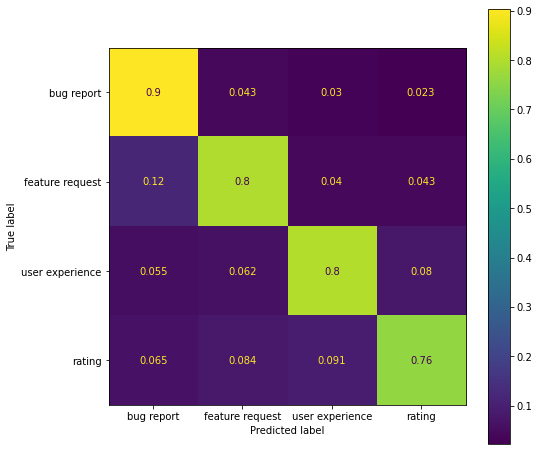

In [ ]:
# Plot confusion matrix.
labels = ["bug report", "feature request", "user experience", "rating"]
fig, ax = plt.subplots(figsize=(8, 8))
cm = confusion_matrix(y_true=Test_Y, y_pred=predictions_SVM, labels=range(len(labels)), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax)